In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modules.funct import gaussian, gaussian_peak

### Single signal visualization

(-1.2e-08, 4e-08)

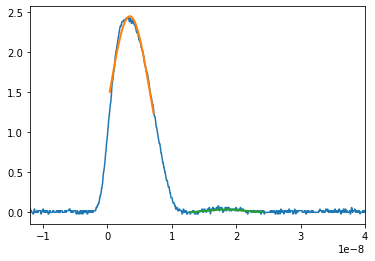

In [55]:
df = pd.read_csv("data/18_11/211118_112355.csv")
labels = ["param", "param_val", "uom", "x", "y"]
df.columns = labels
X = np.array(df["x"])
Y = np.array(df["y"])
popt, pcov, X_, Y_ = gaussian_peak(X, Y, est_mean= 0, est_var= 1e-8, k= 1.25)
popt_, pcov_, X__, Y__ = gaussian_peak(X, Y, est_mean= 2e-8, est_var= 0.5e-8, k= 2, comp_Y= Y_)
plt.plot(X, Y)
plt.plot(X_, gaussian(X_, *popt), lw = 2)
plt.plot(X__, gaussian(X__, *popt_), lw = 2)
plt.xlim([-1.2e-8, 4e-8])

### Minimization of amplitudes ratio - signal_parameteres

In [30]:
files = pd.read_csv("data/18_11/signal_parameters.txt", sep =";", comment="#" )

In [31]:
ratios = []
for file_name in files["file_name"]:
    df = pd.read_csv("data/18_11/"+file_name)
    #print(file_name)
    labels = ["param", "param_val", "uom", "x", "y"]
    df.columns = labels
    X = np.array(df["x"])
    Y = np.array(df["y"])
    popt, pcov, X_, Y_ = gaussian_peak(X, Y, est_mean= 0, est_var= 1e-8, k= 1.25)
    popt_, pcov_, X__, Y__ = gaussian_peak(X, Y, est_mean= 2e-8, est_var= 0.5e-8, k= 2, comp_Y= Y_)
    ratios.append(popt_[0]/popt[0])

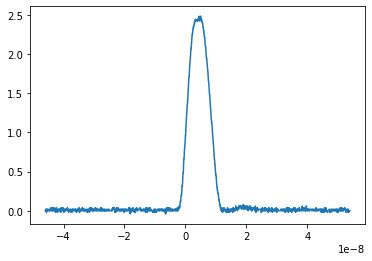

In [32]:
df = pd.read_csv("data/18_11/"+files["file_name"][np.argmin(ratios)])
labels = ["param", "param_val", "uom", "x", "y"]
df.columns = labels
X = np.array(df["x"])
Y = np.array(df["y"])
plt.plot(X, Y)

### Minimization of amplitudes ratio - pulse_generator

In [46]:
files_ = pd.read_csv("data/18_11/pulse_generator_files.txt", sep =";", comment="#" )

In [47]:
ratios_ = []
for file_name in files_["file_name"]:
    df = pd.read_csv("data/18_11/"+file_name)
    #print(file_name)
    labels = ["param", "param_val", "uom", "x", "y"]
    df.columns = labels
    X = np.array(df["x"])
    Y = np.array(df["y"])
    popt, pcov, X_, Y_ = gaussian_peak(X, Y, est_mean= 0, est_var= 1e-8, k= 1.25)
    popt_, pcov_, X__, Y__ = gaussian_peak(X, Y, est_mean= 2e-8, est_var= 0.5e-8, k= 2, comp_Y= Y_)
    ratios_.append(popt_[0]/popt[0])

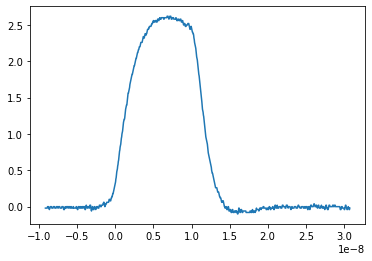

In [48]:
df = pd.read_csv("data/18_11/"+files_["file_name"][np.argmin(ratios_)])
labels = ["param", "param_val", "uom", "x", "y"]
df.columns = labels
X = np.array(df["x"])
Y = np.array(df["y"])
plt.plot(X, Y)

### Saving results 

In [45]:
with open("results.txt", "w") as f:
    line = [files.columns[i] for i in range(len(files.columns))]
    line.append("ampl_ratio")
    line.append("refer_file")
    line = ",".join(line)
    f.write(line + "\n")
    file = "signal_parameters"
    for i in range(len(files)):
        line = [str(files[str(files.columns[j])][i]) for j in range(len(files.columns))]
        line.append(str(ratios[i]))
        line.append(file)
        line = ",".join(line)
        f.write(line+ "\n")
    file = "pulse_generator"
    for i in range(len(files_)):
        line = [str(files_[str(files_.columns[j])][i]) for j in range(len(files_.columns))]
        line.append("")
        line.append("")
        line.append("")
        line.append(str(ratios_[i]))
        line.append(file)
        line = ",".join(line)
        f.write(line+ "\n")
         